In [7]:
import numpy as np  # Para hacer todas las operaciones de tipo Numericas
import pandas as pd   # Para el procesamiento de datos y las operaciones de entrada y salida de los archivos
import matplotlib.pyplot as plt     # Para la visualisacion de diferentes tipos de graficos
%matplotlib inline   
# # Para hacer graficos de forma que esten incluidos dentro del mismo Notebook junto al Coid que nosotros escribamo
import seaborn as sns      # para la Visualisacion Avanzada de los Graficos 
import warnings     # Para silenciar los Warnings 
warnings.filterwarnings('ignore')       # Esto sirve solo para quital las Alternativas a otras alternativas que nos arroja
# Y consumen tiempo y nos alertan de manera embana.

In [8]:
co2 = pd.read_excel('FuelConsumptionCo2.xlsx') # Cargamos el archivo de Excel en un DataFrame
co2 # Mostramos el DF

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
941,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219
942,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232
943,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236


# 1- Elimine las columnas de tipo categórico de la base de datos y verifique que no existan datos nulos que deban ser eliminados de manera previa al análisis.

In [9]:
co2.columns # Mostramos las Columnas del DF

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [10]:
co2.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE'], axis=1, inplace=True) # removemos las columnas que son categoricas 
# Con axis=1 le decimos que nos remueva las columnas y con inplace=True le decimos que lo haga en el mismo Data Frame
co2 

,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,9.9,7.0,8.6,33,200
1,12.6,9.4,11.2,25,263
2,11.0,8.6,9.9,29,232
3,11.3,9.1,10.3,27,242
4,11.2,8.0,9.8,29,230
...,...,...,...,...,...
940,10.7,7.7,9.4,30,219
941,10.5,8.1,9.4,30,219
942,11.0,8.7,9.9,29,232
943,11.5,8.4,10.1,28,236


## Mostraremos los valores Faltantes

<Axes: >

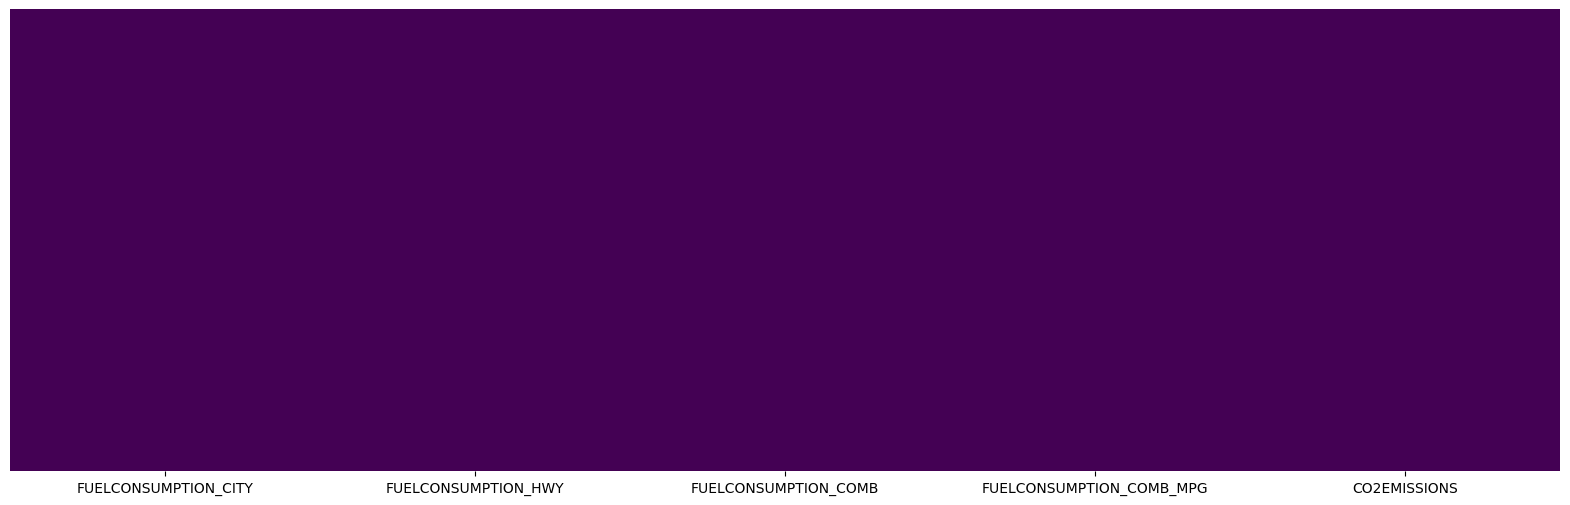

In [11]:
plt.figure(figsize=(20,6)) # Tamaño de la figura 20 * 6

# Mapa de calor
sns.heatmap(co2.isnull(), yticklabels=False, cbar=False, cmap='viridis') # yticklabels=False, cbar=False, cmap='viridis' son para quitar las etiquetas de los ejes y la barra de color y cambiar el color de los valores faltantes a viridis 
# Esto es para visualisar de color amarillo los valores fantantes en la base de datos 

###  -No tenemos valores faltantes lo que nos indica que podemos continuar el analisis.

# 2- Realice un análisis de regresión múltiple para pronosticar la variable “CO2 EMISSIONS” con las variables remanentes. Obtenga los indicadores de bondad de ajuste correspondientes (R cuadrada, Error medio absoluto, etc.). Utilice los coeficientes resultantes y pronostique la primera observación de la base de prueba. ¿Coincide su resultado con aquel obtenido con la instrucción “predict”? Explique.

In [12]:
X = co2.drop('CO2EMISSIONS', axis=1) # removemos la columna 'CO2EMISSIONS' que es la que queremos predecir
y = co2['CO2EMISSIONS'] # guardamos la columna 'CO2EMISSIONS' en y que es la que queremos predecir

In [13]:
X

,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,9.9,7.0,8.6,33
1,12.6,9.4,11.2,25
2,11.0,8.6,9.9,29
3,11.3,9.1,10.3,27
4,11.2,8.0,9.8,29
...,...,...,...,...
940,10.7,7.7,9.4,30
941,10.5,8.1,9.4,30
942,11.0,8.7,9.9,29
943,11.5,8.4,10.1,28


In [14]:
y

0      200
1      263
2      232
3      242
4      230
      ... 
940    219
941    219
942    232
943    236
944    252
Name: CO2EMISSIONS, Length: 945, dtype: int64

### -Usaremos MACHINELEARNING para divirdir nuestra base de datos, en la base de entrenamiento y la base de prueba 

In [15]:
# Division en grupos de entrnamiento (TRAINING) y de prueba (TESTING)
from sklearn.model_selection import train_test_split # importammos la libreria para dividir los datos en grupos de entrenamiento y de prueba
# usaremos la funcion train_test_split de la libreria sklearn.model_selection
# daremos la matriz original X y el Vector Y y el tamaño del grupo de prueba que sera del 30% 
# Y el random_state=101 para que siempre se divida de la misma forma y 1 para que sean comparables los resultados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1) 

### -CONSTRUIREMOS UN MODELO DE REGRESION LINEAL PARA VER SI PODEMOS MEJORARLO

In [16]:
# Contruccion de un modelo de regresion lineal multiple
from sklearn.linear_model import LinearRegression # importamos la libreria para hacer la regresion multiple
linreg = LinearRegression() # creamos un objeto de la clase LinearRegression
linreg.fit(X_train, y_train) # entrenaremos el modelo con los datos de entrenamiento y para hacer el ajuste de la regresion lineal multiple

LinearRegression()

In [17]:
# Impresion de los coeficientes de la regresion lineal multiple
print('EL INTERCEPTO ES DE:', linreg.intercept_) # imprimiremos el INTERCEPTO
print('LOS COEFICIENTES SON DE:', linreg.coef_) # imprimiremos los COEFICIENTES 

EL INTERCEPTO ES DE: 95.9336131926735
LOS COEFICIENTES SON DE: [10.85607131  5.91025898  0.71589393 -1.33087138]


### La ecuacion quedaria de la siguiente forma 
### el intercepto '95.933' + el primer coeficiente que es de '10.85' * X1, + '.591' 'por que esta en notacion cientifica', * X2 
### y asi sucesivamente hasta llegar al ultimo coeficiente

In [18]:
# Predicciones
y_pred = linreg.predict(X_test) # Hacemos la prediccion con los datos de prueba
y_pred

array([323.9684702 , 318.99111862, 351.63995823, 174.32801949,
       196.22179696, 246.30366202, 249.80010686, 327.69501755,
       323.43951275, 172.67624174, 272.69662047, 221.15870395,
       322.0301954 , 263.34932072, 183.81461788, 267.43679146,
       162.2817638 , 224.20058458, 334.07766686, 320.6056832 ,
       318.99111862, 340.5415991 , 254.69901248, 224.20058458,
       338.96141074, 205.27024177, 368.03937916, 321.36758011,
       297.85515221, 130.73051692, 180.24094285, 183.81461788,
       247.36441388, 296.30265608, 318.85746077, 280.22130457,
       326.34493169, 309.94267381, 323.43951275, 223.34507996,
       296.33986926, 284.3860055 , 235.0688412 , 185.37275481,
       170.09172917, 255.95265367, 194.22831029, 341.07055655,
       143.31137086, 184.67012251, 295.61518552, 246.56814074,
       170.18817383, 258.29190199, 109.70865471, 313.74361439,
       341.56513778, 333.81318814, 304.22547674, 371.84035287,
       198.65748995, 154.71706269, 189.63109657, 311.02

In [ ]:
# Calculo de indicadores de la bonda de ajuste
from sklearn.metrics import r2_score # importamos la libreria para calcular el R^2-
from sklearn import metrics # imñortamos otras librerias para calcular otros indicadores de la bondad de ajuste 

In [20]:
# Impresion de indicadores de bondad de ajuste 
print('Valor de R^2:', r2_score(y_test, y_pred)) # Hay que indicarle cual es la Y real y cual de la Y de prediccion
print('Erro absoluto Medio:', metrics.mean_absolute_error(y_test, y_pred)) # Calculamos el error absoluto medio
print('Error Cuadratrico Medio:', metrics.mean_squared_error(y_test, y_pred)) # Calculamos el error cuadratico medio
print('Raiz Del Error Cuadratico Medio:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Calculamos la raiz del error cuadratico medio 

Valor de R^2: 0.9809388418270503
Erro absoluto Medio: 5.69451966462705
Error Cuadratrico Medio: 72.94435631403684
Raiz Del Error Cuadratico Medio: 8.540746824138791


In [21]:
# Primera observación de la base de prueba
first_observation = X_test.iloc[0]
print("Primera observación de la base de prueba:", first_observation)

# Predicción de la primera observación
first_prediction = linreg.predict([first_observation])
print("Predicción de la primera observación:", first_prediction)

# Valor real de la primera observación
real_value = y_test.iloc[0]
print("Valor real de la primera observación:", real_value)

# Comparación
print("¿Coincide la predicción con el valor real?", np.isclose(first_prediction, real_value))

Primera observación de la base de prueba: FUELCONSUMPTION_CITY        15.6
FUELCONSUMPTION_HWY         12.7
FUELCONSUMPTION_COMB        14.3
FUELCONSUMPTION_COMB_MPG    20.0
Name: 786, dtype: float64
Predicción de la primera observación: [323.9684702]
Valor real de la primera observación: 334
¿Coincide la predicción con el valor real? [False]


# 3- Repita el ejercicio 3 pero aplicando un modelo de regresión Ridge mediante el valor de Alpha óptimo.

In [ ]:
from sklearn.linear_model import RidgeCV # Importamos la libreria RidgeCV para hacer la regresion lineal con regularizacion
# RidgeCV es una regresion lineal con regularizacion que nos permite hacer la validacion cruzada para encontrar el mejor valor de ALPHA

from sklearn.preprocessing import MinMaxScaler # Importamos la libreria MinmaScater para normalizar los datos 
# Normalización de las características
scaler = MinMaxScaler() # creamos un objeto de la clase MinMaxScaler
X_train_scales = scaler.fit_transform(X_train) # Normalizamos los datos de entrenamiento
X_test_scaled = scaler.transform(X_test) # Normalizamos los datos de prueba

# Definicion un rango de prueba para Alpha
alpha_range = 10.**np.arange(-2,3) # Creamos un rango de prueba para alpha que va de 10^-2 a 10^3 
alpha_range

ridgeregcv = RidgeCV(alphas=alpha_range, scoring='neg_mean_squared_error') # Creamos un Objeto de la clase RidgeCV con los valores de alpha_range y scoring='neg_mean_squared_error' para que nos de el error cuadratico medio 
# Ahora hacemos el ajuste a continuacion
ridgeregcv.fit(X_train, y_train) # Entrenamos el modelo con los datos de entrenamiento # Nos dira cual Alpha es mejor para nuestro modelo
ridgeregcv.alpha_ # nos dira cual es el mejor valor de alpha para nuestro modelo

10.0

In [ ]:
# Prediccion con el mejor valor de alpha
y_pred = ridgeregcv.predict(X_test) # Hacemos la prediccion con los datos de prueba

# Impresion de indicadores de bondad de ajuste 
print('Valor de R^2:', r2_score(y_test, y_pred)) # Hay que indicarle cual es la Y real y cual de la Y de prediccion
print('Erro absoluto Medio:', metrics.mean_absolute_error(y_test, y_pred)) # Calculamos el error absoluto medio
print('Error Cuadratrico Medio:', metrics.mean_squared_error(y_test, y_pred)) # Calculamos el error cuadratico medio
print('Raiz Del Error Cuadratico Medio:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Calculamos la raiz del error cuadratico medio 




Valor de R^2: 0.9808997033819877
Erro absoluto Medio: 5.709158252265118
Error Cuadratrico Medio: 73.09413360754195
Raiz Del Error Cuadratico Medio: 8.54951072328364


In [25]:
# Primera observación de la base de prueba
first_observation = X_test.iloc[0]
print("Primera observación de la base de prueba:", first_observation)

# Predicción de la primera observación
first_prediction = linreg.predict([first_observation])
print("Predicción de la primera observación:", first_prediction)

# Valor real de la primera observación
real_value = y_test.iloc[0]
print("Valor real de la primera observación:", real_value)

# Comparación
print("¿Coincide la predicción con el valor real?", np.isclose(first_prediction, real_value))

Primera observación de la base de prueba: FUELCONSUMPTION_CITY        15.6
FUELCONSUMPTION_HWY         12.7
FUELCONSUMPTION_COMB        14.3
FUELCONSUMPTION_COMB_MPG    20.0
Name: 786, dtype: float64
Predicción de la primera observación: [323.9684702]
Valor real de la primera observación: 334
¿Coincide la predicción con el valor real? [False]


In [26]:
# Examinacion de los Coeficientes de la Regresion Ridge
print('EL INTERCEPTO ES DE:', ridgeregcv.intercept_) # imprimiremos el INTERCEPTO
print('LOS COEFICIENTES SON DE:', ridgeregcv.coef_) # imprimiremos los COEFICIENTES 

EL INTERCEPTO ES DE: 97.12499222338494
LOS COEFICIENTES SON DE: [ 8.07997596  3.67823551  5.67297035 -1.35146758]


### Podemos ver que no hay mucha diferencia de resultado Con la REGRESION RIDGECV

# 4- Repita el ejercicio 3 pero aplicando un modelo de regresión Lasso mediante el valor de Alpha óptimo. 

In [28]:
# Seleccion del valor optimo de alpha para la regresion LASSO
from sklearn.linear_model import LassoCV # Importamos la libreria LassoCV para hacer la Reresion LASSO con Validacion cruzada
# LassoCV es una regresion Lineal con regularizacion que nos permite hacer la validacion cruzada para encontrar el mejor valor de ALPHA

lassoregcv = LassoCV(n_alphas=100, random_state=1) # Creamos un objeto de la clase LassoCV con los valores de alpha_range y cv=10 para que nos de el error cuadratico medio
# n_alphas=100 es el numero de valores de alpha que queremos probar
# random_state=1 para que siempre nos de el mismo resultado (semilla)
lassoregcv.fit(X_train, y_train) # Entrenamos el modelo con los datos de entrenamiento 
print('Valor optimo de alpha_', lassoregcv.alpha_) # nos dira cul es el mejor valor de alpha para nuestro modelo

Valor optimo de alpha_ 0.45442206714715017


In [29]:
print('Intercepto:', lassoregcv.intercept_) # Imprimimos el intercepto
print('Coeficientes:', lassoregcv.coef_) # imprimimos los coeficientes de la regresion LASSO

Intercepto: 99.641162203833
Coeficientes: [11.10723214  5.8512792   0.28317683 -1.38536394]


In [30]:
# Prediccion mediante REGRESION DE LASSO con un ALPHA optimo 
y_pred = lassoregcv.predict(X_test) # Hacemos la prediccion con los datos de prueba

# Impresion de indicadores de bondad de ajuste 
print('Valor de R^2:', r2_score(y_test, y_pred)) # Hay que indicarle cual es la Y real y cual de la Y de prediccion
print('Erro absoluto Medio:', metrics.mean_absolute_error(y_test, y_pred)) # Calculamos el error absoluto medio
print('Error Cuadratrico Medio:', metrics.mean_squared_error(y_test, y_pred)) # Calculamos el error cuadratico medio
print('Raiz Del Error Cuadratico Medio:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Calculamos la raiz del error cuadratic

Valor de R^2: 0.980417172261453
Erro absoluto Medio: 5.842640097466093
Error Cuadratrico Medio: 74.94071195653487
Raiz Del Error Cuadratico Medio: 8.656830364315502


El modelo de regresión lineal múltiple resultó ser el mejor entre los tres, ya que:

R² más alto: 0.9809, lo que indica que explica mejor la variabilidad de los datos.

Errores más bajos: MAE (5.6945), MSE (72.9444) y RMSE (8.5407) son menores que en los modelos Ridge y Lasso.

Simplicidad: No requiere ajustar un parámetro de regularización (alpha), lo que lo hace más fácil de implementar y entender.

El modelo Ridge tuvo un rendimiento muy similar al de regresión lineal múltiple, pero no mejoró significativamente los resultados. Esto sugiere que la regularización Ridge no fue necesaria en este caso, ya que los datos no presentaban problemas de multicolinealidad severa.

El modelo Lasso tuvo un rendimiento ligeramente inferior, con un R² más bajo y errores ligeramente mayores. Esto puede deberse a que Lasso tiende a reducir algunos coeficientes a cero, lo que puede no ser beneficioso si todas las variables son relevantes para el modelo.

En conclusión, el modelo de regresión lineal múltiple es el más adecuado para este conjunto de datos, ya que ofrece el mejor equilibrio entre precisión y simplicidad.

